In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from scipy.stats import stats
import seaborn as sns
bc_df = pd.read_csv("WISC.csv")

In [2]:
#Convert Categorical values("M" and "B") of Dependent Variable into numerical value ("1" and "0") respectively
bc_df.replace(['M', 'B'], [1, 0], inplace=True)

In [3]:
#Drop "id" column from independent variables
bc_df = bc_df.drop(labels = "id", axis = 1)

In [4]:
bc_df.shape

(569, 31)

In [5]:
#Calculate Z score
z = np.abs(stats.zscore(bc_df))

In [6]:
#Print the outliners
Q1 = bc_df.quantile(0.25)
Q3 = bc_df.quantile(0.75)
IQR = Q3 - Q1
(bc_df < (Q1 - 1.5 * IQR)) |(bc_df > (Q3 + 1.5 * IQR))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,True,...,False,False,False,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,True


In [7]:
#Remove the outliers from the data where z threshold is less than 3
bc_df = bc_df[(z < 3).all(axis=1)]
bc_df.shape

(495, 31)

In [8]:
##Function to find the independent variables which has less than 0.1 correlation with the dependent variable
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(1):
            if corr_matrix.iloc[i, j] < threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                print(colname)

In [9]:
##Print Independent variables which has less than 0.1 correlation with the dependent variable
correlation(bc_df, 0.1)

dimension_mean
texture_se
smoothness_se
symmetry_se


In [10]:
##Drop the independent variables which has less than 0.1 correlation with the dependent variable
def correlationdel(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(1):
            if corr_matrix.iloc[i, j] < threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                print(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
        print(dataset)

In [11]:
##Drop the independent variables which has less than 0.1 correlation with the dependent variable
correlationdel(bc_df, 0.1)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.68          108.10      7

[495 rows x 31 columns]
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.6

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.68          108.10      7

[495 rows x 30 columns]
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.6

[495 rows x 28 columns]
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.6

[495 rows x 27 columns]
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.6

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.68          108.10      7

[495 rows x 27 columns]
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1            1       20.570         17.77          132.90     1326.0   
2            1       19.690         21.25          130.00     1203.0   
4            1       20.290         14.34          135.10     1297.0   
5            1       12.450         15.70           82.57      477.1   
6            1       18.250         19.98          119.60     1040.0   
7            1       13.710         20.83           90.20      577.9   
8            1       13.000         21.82           87.50      519.8   
10           1       16.020         23.24          102.70      797.8   
11           1       15.780         17.89          103.60      781.0   
13           1       15.850         23.95          103.70      782.7   
15           1       14.540         27.54           96.73      658.8   
16           1       14.680         20.13           94.74      684.5   
17           1       16.130         20.6

In [12]:
##4 columns dropped
bc_df.shape

(495, 27)

In [13]:
#Treat “diagnosis” – 2nd Column as your Dependent Variable and Rest of the columns as Independent Variable and split the table
# Create a separate dataframe consisting only of the features i.e independent attributes
bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [14]:
#Create scatter Plot of Independent Variable vs Dependent Variable.
def inddep(dataset):
    for i in range(len(dataset.columns)):
        colname = dataset.columns[i]
        dataset.plot.scatter(x=colname, y='diagnosis', c='DarkBlue')

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


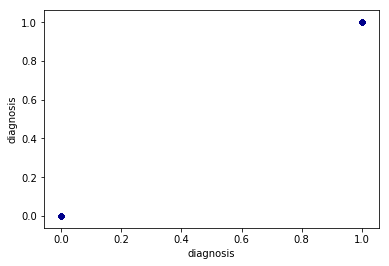

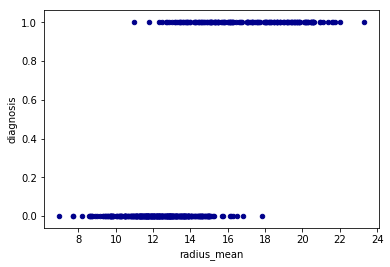

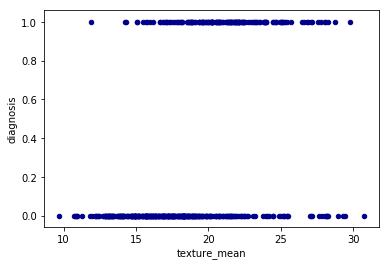

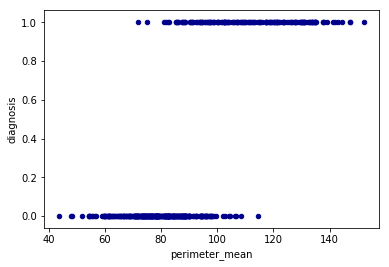

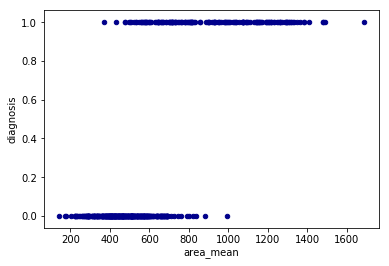

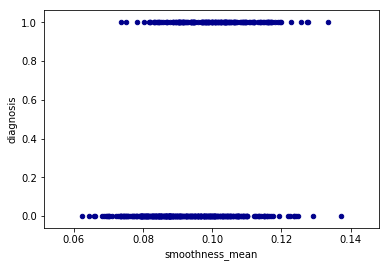

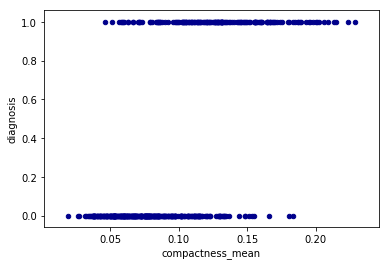

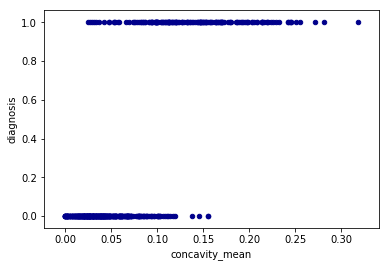

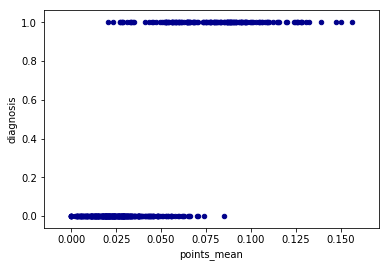

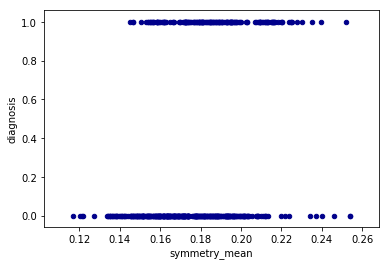

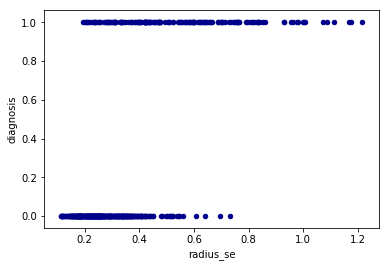

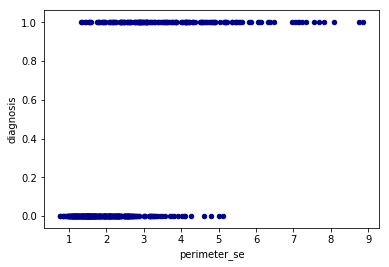

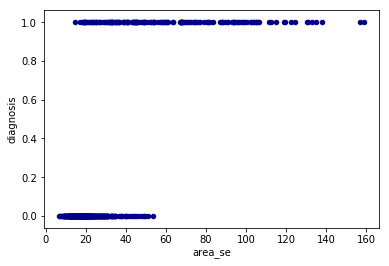

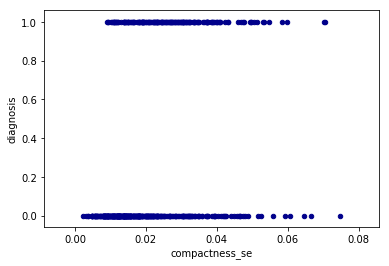

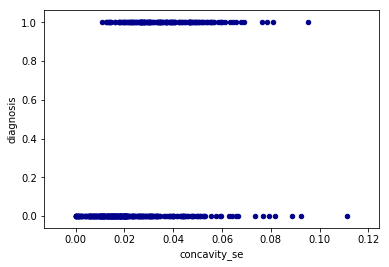

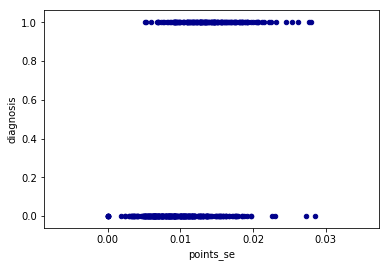

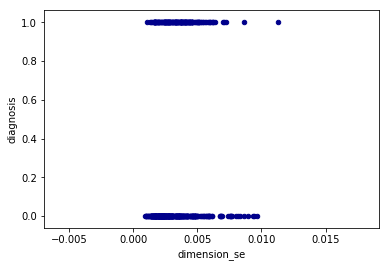

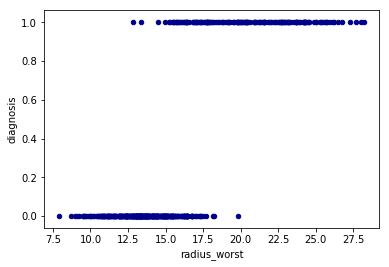

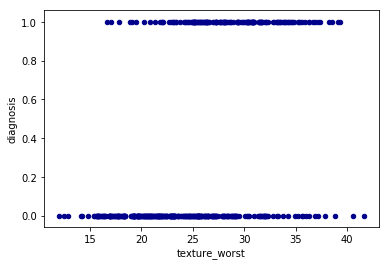

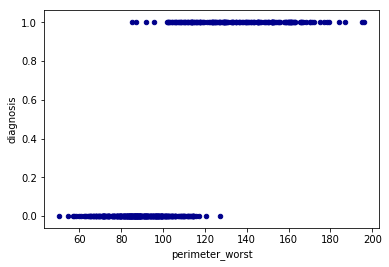

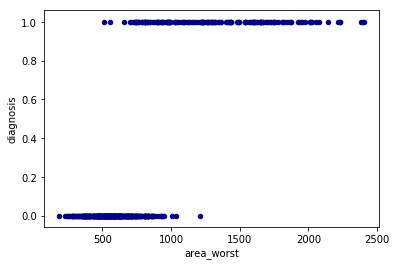

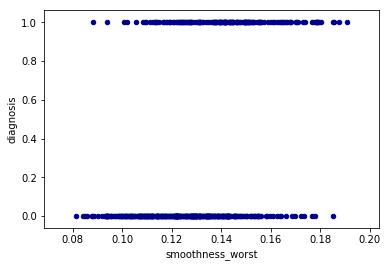

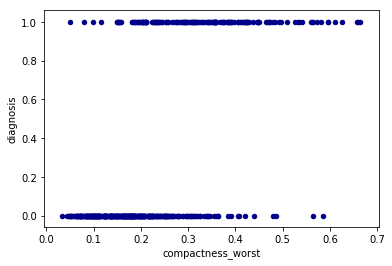

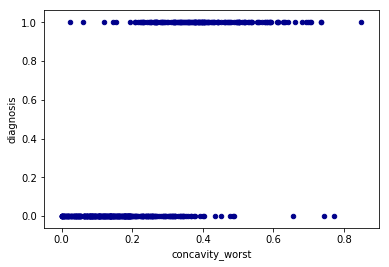

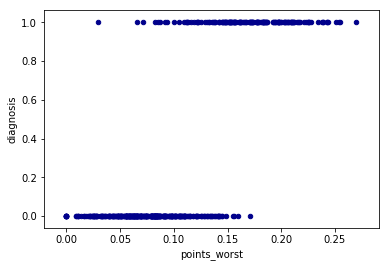

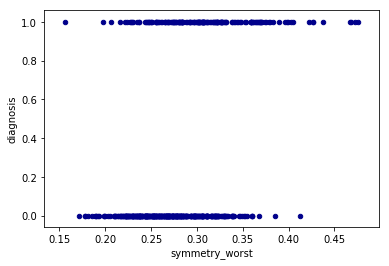

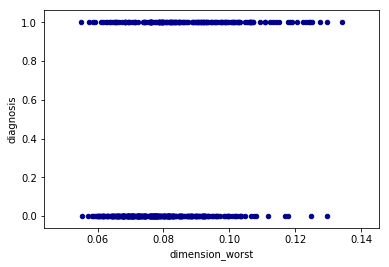

In [15]:
#Create scatter Plot of Independent Variable vs Dependent Variable(2nd Column Diagonisis)as your Dependent Variable.
inddep(bc_df)

In [16]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 
X = np.array(bc_feature_df_z)

In [17]:
bc_labels = bc_df["diagnosis"]
y = np.array(bc_labels)

In [18]:
# Split X and y into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((346, 26), (149, 26), (346,), (149,))

In [19]:
#Divide the data set into training and test data set and build a KNN model
from sklearn.metrics import accuracy_score
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)
pred = NNH.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
acc

95.9731543624161

In [20]:
#Print the optimal value of K using Mis-classification error and the corresponding accuracy for the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

myList = list(range(1,20,2))
cv_scores = []


# empty list that will hold cv scores
k_neighbors = []

# perform 8-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
cv_scores


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)
pred = NNH.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
print('Accuracy for optimal value is',acc)

The optimal number of neighbors is 3
Accuracy for optimal value is 95.9731543624161


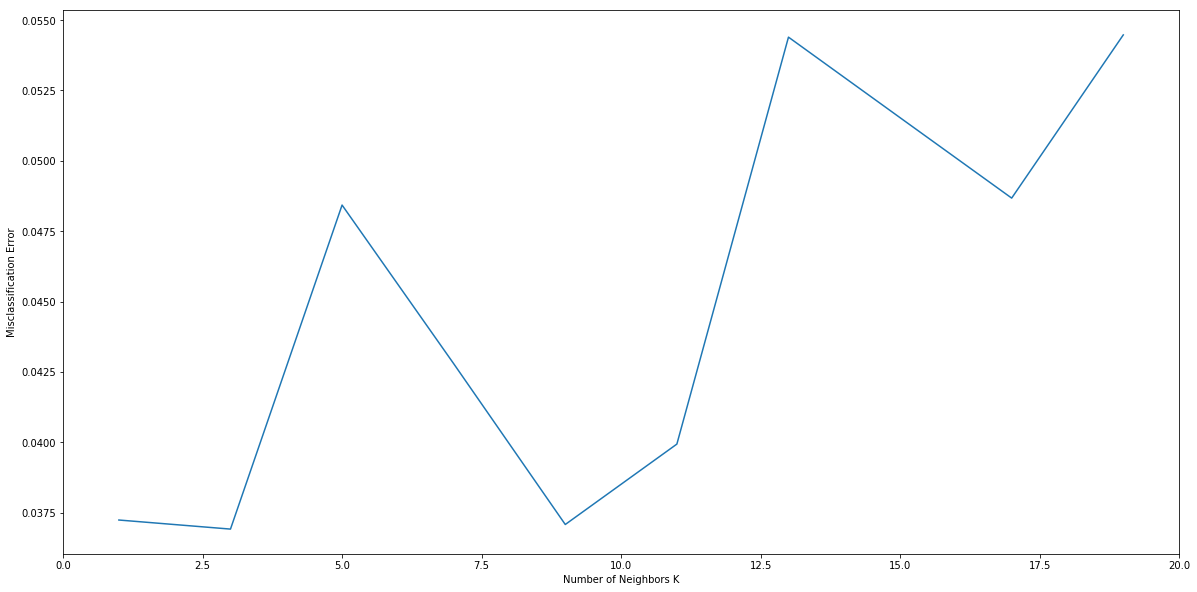

In [21]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,20)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()